In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve,auc

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import xgboost as xgb

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Imported required libraries for Data Analysis.

In [2]:
df = pd.read_csv('Fraud.csv')
df[:10]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [3]:
print(df.isnull().mean())

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64


Data Cleaning by checking for any NULL values. None found.

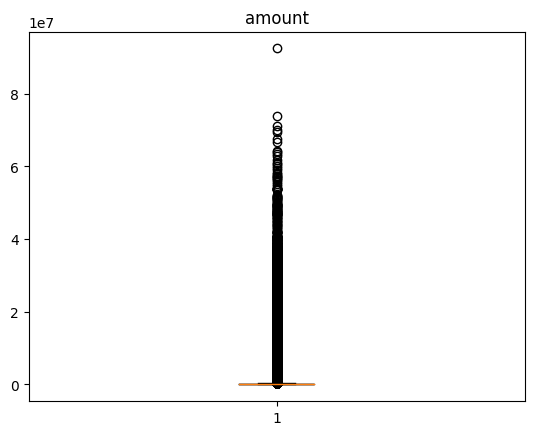

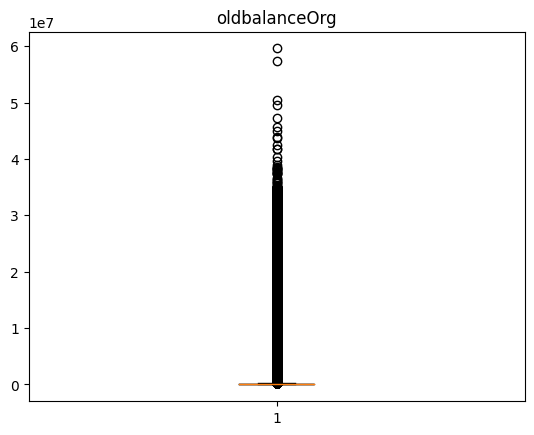

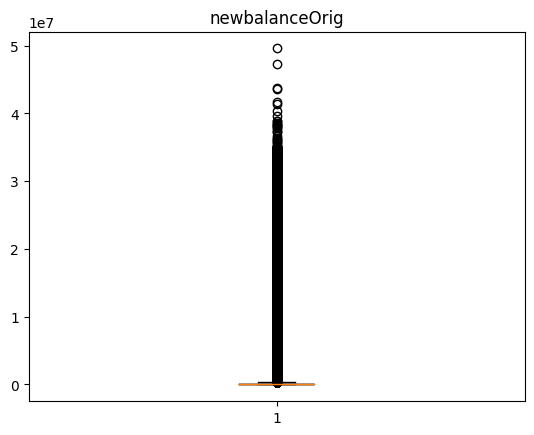

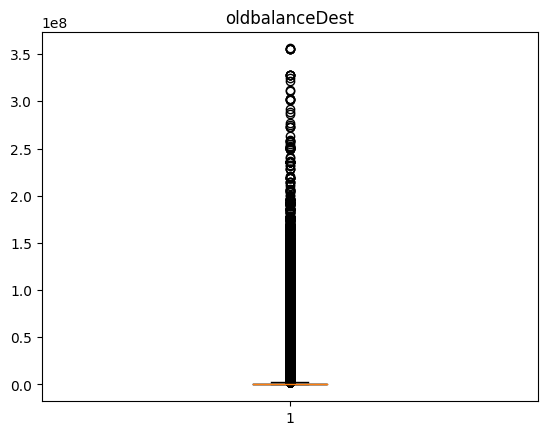

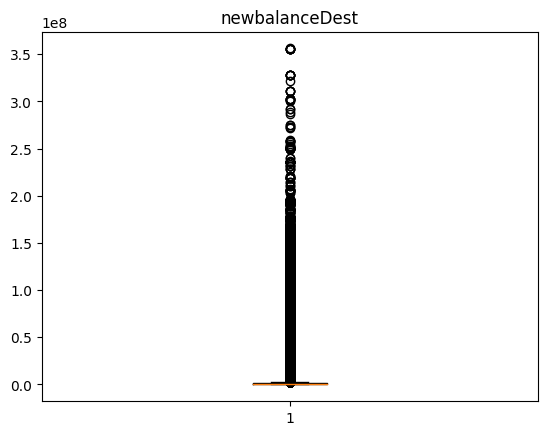

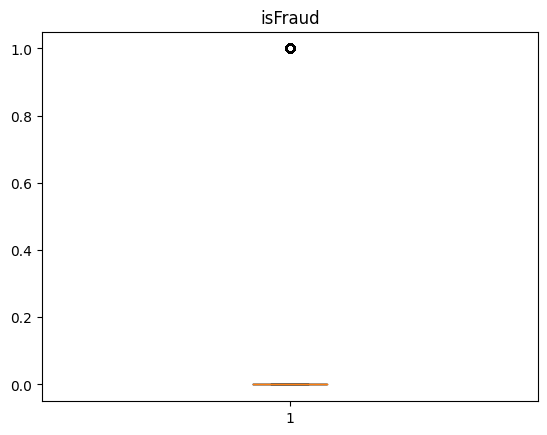

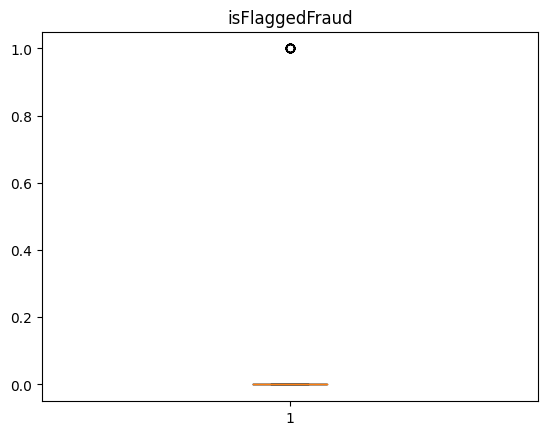

In [4]:
for i in list(df.columns.values)[2:]:
    if i not in ['nameOrig','nameDest']:
        plt.boxplot(df[i])
        plt.title(i)
        plt.show()

Checking for Outliers. Outliers are data points not falling in the range of a majority of other data points. These might lead to bad results in Regression Models.

In [5]:
indexNames = df[df['amount'] > 80000000].index
df.drop(indexNames , inplace=True)

indexNames = df[df['oldbalanceOrg'] > 50000000].index
df.drop(indexNames , inplace=True)

indexNames = df[df['newbalanceOrig'] > 40000000].index
df.drop(indexNames , inplace=True)

indexNames = df[df['oldbalanceDest'] > 350000000].index
df.drop(indexNames , inplace=True)

indexNames = df[df['newbalanceDest'] > 350000000].index
df.drop(indexNames , inplace=True)

Removed Outliers.

In [6]:
df_final = df[['type', 'amount', 'oldbalanceOrg',
       'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
       'isFraud', 'isFlaggedFraud']]
df_final[:20]

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.0,0.00,0,0
1,PAYMENT,1864.28,21249.00,19384.72,0.0,0.00,0,0
2,TRANSFER,181.00,181.00,0.00,0.0,0.00,1,0
3,CASH_OUT,181.00,181.00,0.00,21182.0,0.00,1,0
4,PAYMENT,11668.14,41554.00,29885.86,0.0,0.00,0,0
5,PAYMENT,7817.71,53860.00,46042.29,0.0,0.00,0,0
6,PAYMENT,7107.77,183195.00,176087.23,0.0,0.00,0,0
7,PAYMENT,7861.64,176087.23,168225.59,0.0,0.00,0,0
8,PAYMENT,4024.36,2671.00,0.00,0.0,0.00,0,0
9,DEBIT,5337.77,41720.00,36382.23,41898.0,40348.79,0,0


Some columns based on specific details of the transaction are removed such as Account No. and Transaction Id., in order to make regression models work on the data.

In [7]:
label = LabelEncoder()
df_final['type'] = label.fit_transform(df_final['type'])
df_final[:10]

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,3,9839.64,170136.00,160296.36,0.0,0.00,0,0
1,3,1864.28,21249.00,19384.72,0.0,0.00,0,0
2,4,181.00,181.00,0.00,0.0,0.00,1,0
3,1,181.00,181.00,0.00,21182.0,0.00,1,0
4,3,11668.14,41554.00,29885.86,0.0,0.00,0,0
5,3,7817.71,53860.00,46042.29,0.0,0.00,0,0
6,3,7107.77,183195.00,176087.23,0.0,0.00,0,0
7,3,7861.64,176087.23,168225.59,0.0,0.00,0,0
8,3,4024.36,2671.00,0.00,0.0,0.00,0,0
9,2,5337.77,41720.00,36382.23,41898.0,40348.79,0,0


Encoded the attribute 'type' to numerical values to work with regression models.

In [8]:
encoding = {"PAYMENT" : 3, "TRANSFER" : 4, "CASH_OUT" : 1, "DEBIT" : 2, "CASH_IN" : 0}

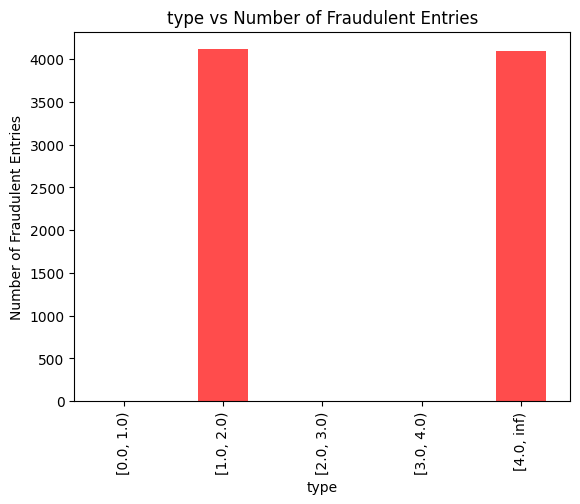

In [9]:
bin_edges = [0, 1, 2, 3, 4, float('inf')]  

df_final['bins'] = pd.cut(df_final['type'], bins=bin_edges, right=False)

fraudulent_entries = df_final[df_final['isFraud'] == 1]

fraudulent_counts = fraudulent_entries.groupby('bins').size()

fraudulent_counts.plot(kind='bar', color='red', alpha=0.7)

plt.xlabel('type')
plt.ylabel('Number of Fraudulent Entries')
plt.title('type vs Number of Fraudulent Entries')

plt.show()

From this, we can infer that only CASH_OUT and TRANSFER payments are fraudulent.

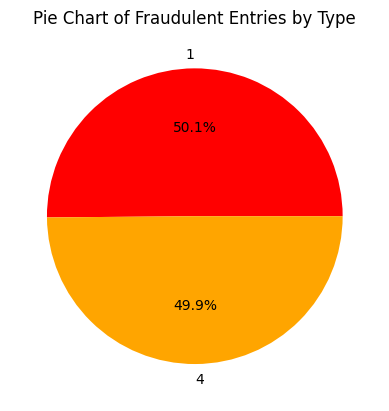

In [10]:
fraudulent_entries = df_final[df_final['isFraud'] == 1]

fraudulent_counts = fraudulent_entries['type'].value_counts()

plt.pie(fraudulent_counts, labels=fraudulent_counts.index, autopct='%1.1f%%', colors=['red', 'orange', 'yellow', 'green', 'blue'])

plt.title('Pie Chart of Fraudulent Entries by Type')

plt.show()

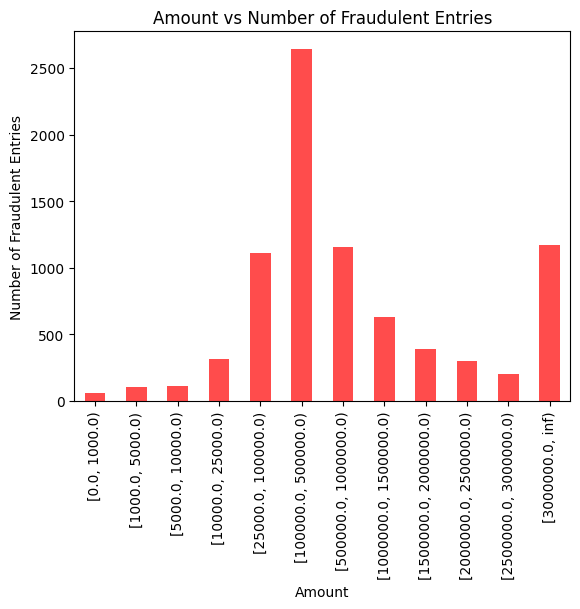

In [11]:
bin_edges = [0, 1000, 5000, 10000, 25000, 100000, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, float('inf')]  

df_final['bins'] = pd.cut(df_final['amount'], bins=bin_edges, right=False)

fraudulent_entries = df_final[df_final['isFraud'] == 1]

fraudulent_counts = fraudulent_entries.groupby('bins').size()

fraudulent_counts.plot(kind='bar', color='red', alpha=0.7)

plt.xlabel('Amount')
plt.ylabel('Number of Fraudulent Entries')
plt.title('Amount vs Number of Fraudulent Entries')

plt.show()

Plotting the distribution of fraudulent entries with respect to amount.

In [12]:
df_final.head()
df_final = df_final.drop(['bins'], axis = 1)

In [13]:
final_df_corr = df_final.corr()
final_df_corr

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
type,1.000000,0.088536,-0.339829,-0.352815,-0.105298,-0.059702,0.020815,0.002685
amount,0.088536,1.000000,-0.002904,-0.007986,0.295605,0.461208,0.076651,0.012321
oldbalanceOrg,-0.339829,-0.002904,1.000000,0.998806,0.066639,0.042262,0.009909,0.003835
newbalanceOrig,-0.352815,-0.007986,0.998806,1.000000,0.068213,0.042067,-0.008352,0.003777
oldbalanceDest,-0.105298,0.295605,0.066639,0.068213,1.000000,0.976387,-0.005912,-0.000516
newbalanceDest,-0.059702,0.461208,0.042262,0.042067,0.976387,1.000000,0.000547,-0.000531
isFraud,0.020815,0.076651,0.009909,-0.008352,-0.005912,0.000547,1.000000,0.044117
isFlaggedFraud,0.002685,0.012321,0.003835,0.003777,-0.000516,-0.000531,0.044117,1.000000


Generating correlation matrix

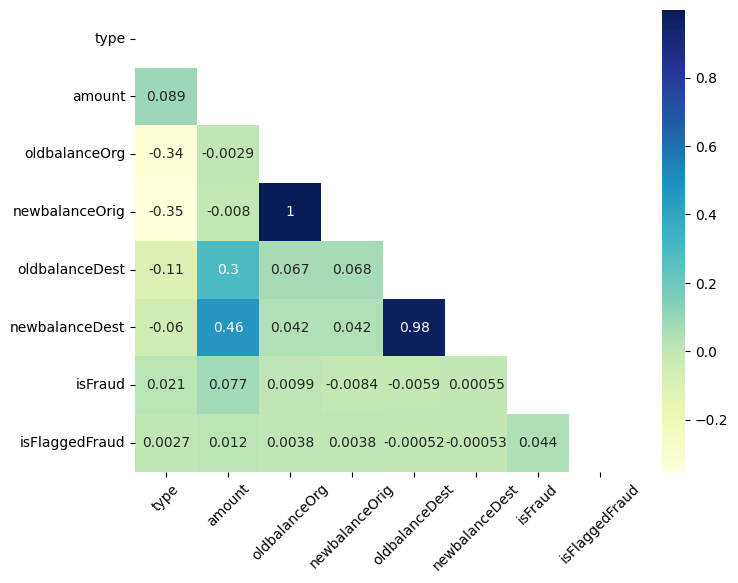

In [14]:
mask = np.triu(np.ones_like(final_df_corr, dtype=bool))
plt.figure(figsize=(8,6))
sns.heatmap(final_df_corr,annot=True, mask = mask, cmap=plt.cm.YlGnBu)
plt.xticks(rotation=45)
plt.show()

We can notice a very high correlation between new balance and old balance. So, we will drop one of them, which will be new balance because CASH_OUT is a major fraudulent type.

In [15]:
df_final = df_final.drop(['newbalanceDest'], axis = 1)
df_final = df_final.drop(['newbalanceOrig'], axis = 1)

In [16]:
X = df_final.drop(['isFraud'], axis=1)
y = df_final['isFraud']

columns = ['type', 'amount', 'oldbalanceDest', 'oldbalanceOrg','isFlaggedFraud']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X[columns])
X = pd.DataFrame(scaled_data)

Feature Scaling has been performed.

In [17]:
X_, X_test, y_, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.18, random_state=42)
print('X_train = ',X_train.shape,
      'X_val = ',X_val.shape,
      'X_test = ', X_test.shape,
      'y_train = ',y_train.shape,
      'y_val = ',y_val.shape,
      'y_test = ',y_test.shape)

X_train =  (4434735, 5) X_val =  (973479, 5) X_test =  (954391, 5) y_train =  (4434735,) y_val =  (973479,) y_test =  (954391,)


Split the dataset into three parts : 

    Test : 15 %
    Val : 15.3 %
    Train : 69.7%

In [18]:
#print(X_train)
reg_model = LogisticRegression()
reg_model.fit(X_train,y_train)

LogisticRegression()

Trained using Logistic Regression.

In [19]:
print(f'accuracy is {round(reg_model.score(X_val,y_val)*100,2)}')

accuracy is 99.88


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

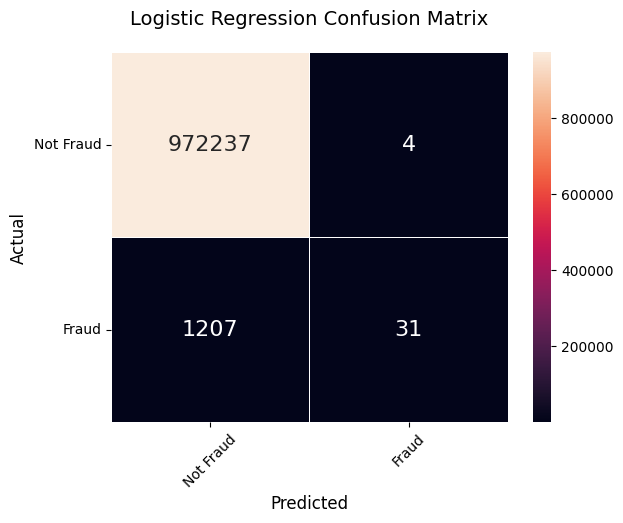

In [20]:
y_pred = reg_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Fraud', 'Fraud']

axes.set_xlabel('Predicted', fontsize=12)
axes.set_ylabel('Actual', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Logistic Regression Confusion Matrix', fontsize=14, pad=20)

Precision (P) = 972237/(972237+4) = 99.9995% 

Recall (R) = 972237/(972237+1207) = 99.8760% 

F1_score = 2*P*R/(P+R) = 99.89% 

accuracy = (972237+957)/(972237+1207+31+4) = 99.9707% 

In [21]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_val)
print('Decision Tree:')
print('Accuracy:', accuracy_score(y_val, y_pred))
print('Precision:', precision_score(y_val, y_pred))
print('Recall:', recall_score(y_val, y_pred))
print('F1 Score:', f1_score(y_val, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_val, y_pred))
print()

Decision Tree:
Accuracy: 0.9993651635012157
Precision: 0.7433281004709577
Recall: 0.7649434571890146
F1 Score: 0.7539808917197452
Confusion Matrix:
 [[971914    327]
 [   291    947]]



In [24]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)
print('Random Forest:')
print('Accuracy:', accuracy_score(y_val, y_pred))
print('Precision:', precision_score(y_val, y_pred))
print('Recall:', recall_score(y_val, y_pred))
print('F1 Score:', f1_score(y_val, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_val, y_pred))
print()

Random Forest:
Accuracy: 0.9995778029110027
Precision: 0.9276111685625646
Recall: 0.7245557350565428
F1 Score: 0.8136054421768707
Confusion Matrix:
 [[972171     70]
 [   341    897]]



In [25]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_val)
print('K-Nearest Neighbors:')
print('Accuracy:', accuracy_score(y_val, y_pred))
print('Precision:', precision_score(y_val, y_pred))
print('Recall:', recall_score(y_val, y_pred))
print('F1 Score:', f1_score(y_val, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_val, y_pred))

K-Nearest Neighbors:
Accuracy: 0.9994709695843464
Precision: 0.8400752587017873
Recall: 0.721324717285945
F1 Score: 0.7761842677096914
Confusion Matrix:
 [[972071    170]
 [   345    893]]


In [26]:
def verdict(x):
    x['type'] = encoding[x['type']]
    value = reg_model.predict_proba(x)
    if value > 0.7 :
        return "Check Fraud"
    elif value < 0.3 :
        return "Legitimate"
    else:
        return "Suspicious"